In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from dataset.dataset import SaladsDataset
from main import discover_dk_process
from Config import Config
import json
import pickle as pkl
import pm4py

In [2]:
with open("config.json", "r") as f:
    cfg_json = json.load(f)
    cfg = Config(**cfg_json)

In [3]:
with open(cfg.data_path, "rb") as f:
    dataset = pkl.load(f)
salads_dataset = SaladsDataset(dataset['target'], dataset['stochastic'])
train_dataset, test_dataset = train_test_split(salads_dataset, train_size=cfg.train_percent, shuffle=True,
                                               random_state=cfg.seed)

In [4]:
model, initial, final = discover_dk_process(train_dataset, cfg)

In [5]:
nx_model = pm4py.convert_petri_net_to_networkx(model, initial, final)

In [6]:
{n[1]['attr']['type'] for n in nx_model.nodes(data=True)}

{'place', 'transition'}

In [16]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

node_names = np.array([n[0] for n in nx_model.nodes(data=True)]).reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
nodes_one_hot = encoder.fit_transform(node_names)
nodes_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

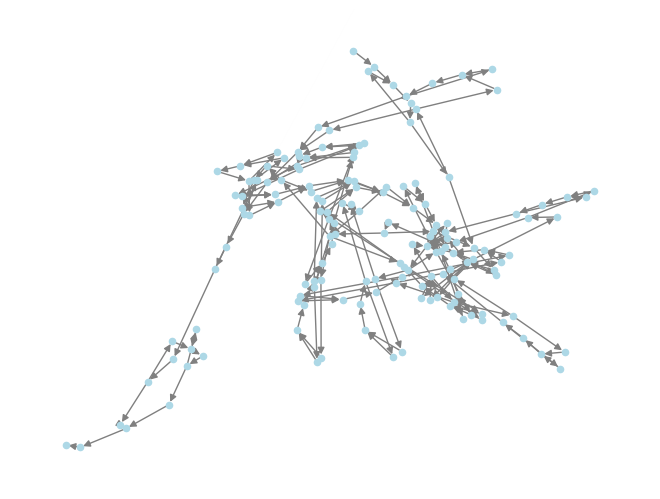

In [12]:
import networkx as nx

nx.draw(nx_model, with_labels=False, node_color='lightblue', edge_color='gray', node_size=20, font_size=15)

In [12]:
for node in nx_model.nodes(data=True):
    node[1]['x'] = 1
next(iter(nx_model.nodes(data=True)))

('p_51',
 {'attr': {'name': 'p_51',
   'is_in_im': False,
   'is_in_fm': False,
   'type': 'place'},
  'x': 1})

In [9]:
from torch_geometric.utils import from_networkx

data = from_networkx(nx_model)

In [13]:
type(data)

torch_geometric.data.data.Data